In [0]:
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weather_data = pd.read_excel("/content/dup.xlsx")

In [0]:
weather_data.head(2)

,Year,Average of Avg. Temperature in Kelvin,Average of SNOW Avg. Number of Pixels,Average of NDVI Avg. Number of pixel
0,2001-01-01,271.344059,6790.325,9418.25
1,2001-02-01,273.913663,6497.100,12998.90


In [0]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
Year                                     204 non-null datetime64[ns]
Average of Avg. Temperature in Kelvin    204 non-null float64
Average of SNOW Avg. Number of Pixels    204 non-null float64
Average of NDVI Avg. Number of pixel     204 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.5 KB


In [0]:
input_feature= weather_data.iloc[:,[2,3]].values
input_data = input_feature

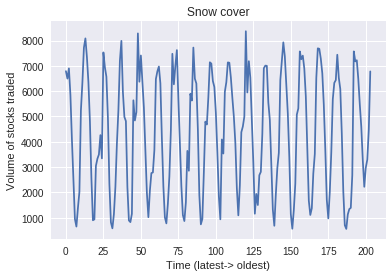

In [0]:
plt.plot(input_feature[:,0])
plt.title("Snow cover")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

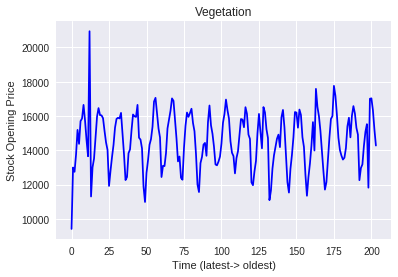

In [0]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Vegetation")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 60
test_size=int(.3 * len(weather_data))
X=[]
y=[]
for i in range(0, len(weather_data)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i,1])

In [0]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(144, 60, 2)
(61, 60, 2)


In [0]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [0]:
model = Sequential()
model.add(LSTM(units=105, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=105, return_sequences=True))
model.add(LSTM(units=105))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 60, 105)           45360     
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 105)           88620     
_________________________________________________________________
lstm_15 (LSTM)               (None, 105)               88620     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 106       
Total params: 222,706
Trainable params: 222,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(X, y, epochs=100, batch_size=32)


Epoch 1/100
144/144 [==============================] - 5s 32ms/step - loss: 0.1078
Epoch 2/100
144/144 [==============================] - 1s 7ms/step - loss: 0.0273
Epoch 3/100
144/144 [==============================] - 1s 7ms/step - loss: 0.0250
Epoch 4/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0209
Epoch 5/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0189
Epoch 6/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0179
Epoch 7/100
144/144 [==============================] - 1s 7ms/step - loss: 0.0168
Epoch 8/100
144/144 [==============================] - 1s 7ms/step - loss: 0.0161
Epoch 9/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0152
Epoch 10/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0148
Epoch 11/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0143
Epoch 12/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0132
Epoch 13/100

In [0]:
predicted_value= model.predict(X_test)


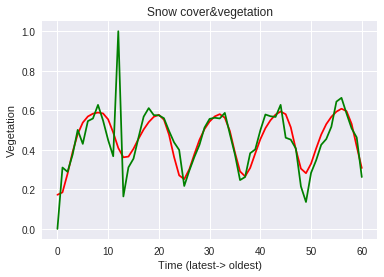

In [0]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:61,1], color='green')
plt.title("Snow cover&vegetation")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Vegetation")
plt.show()

In [0]:
input_data[:61,1]

array([0.        , 0.31055972, 0.28884616, 0.37619041, 0.50092949,
       0.43019457, 0.54536702, 0.5586328 , 0.62746393, 0.54810778,
       0.4494796 , 0.36767759, 1.        , 0.16416346, 0.311375  ,
       0.35556102, 0.46381219, 0.56790454, 0.61119286, 0.57554569,
       0.57454827, 0.56002053, 0.49594669, 0.43771864, 0.39954321,
       0.21723525, 0.29478302, 0.36392639, 0.42514672, 0.51259504,
       0.55668131, 0.56234496, 0.55874555, 0.58699008, 0.47959756,
       0.37614704, 0.24705398, 0.26256613, 0.3829599 , 0.40232299,
       0.4982321 , 0.57874613, 0.57001214, 0.56652548, 0.62754199,
       0.46149209, 0.4517043 , 0.40680708, 0.21521871, 0.13617913,
       0.2834644 , 0.34697013, 0.42555003, 0.45469658, 0.51667582,
       0.64396918, 0.66313279, 0.58321287, 0.50834948, 0.46275839,
       0.26249675])

In [0]:
predicted_value

array([[0.17263453],
       [0.18491867],
       [0.27916566],
       [0.38996282],
       [0.47987255],
       [0.5378948 ],
       [0.56880146],
       [0.58304596],
       [0.5887629 ],
       [0.5841954 ],
       [0.55409104],
       [0.4877762 ],
       [0.40942556],
       [0.3622183 ],
       [0.36588332],
       [0.40568626],
       [0.45659813],
       [0.50304306],
       [0.54028964],
       [0.56721133],
       [0.5772237 ],
       [0.55250865],
       [0.47642383],
       [0.36343098],
       [0.27090868],
       [0.2517074 ],
       [0.30160114],
       [0.37835154],
       [0.4503909 ],
       [0.5052562 ],
       [0.5432534 ],
       [0.5688642 ],
       [0.58051354],
       [0.5625333 ],
       [0.4948428 ],
       [0.38606718],
       [0.2909996 ],
       [0.26578787],
       [0.3086428 ],
       [0.38197336],
       [0.4535168 ],
       [0.50945514],
       [0.54968584],
       [0.5782343 ],
       [0.5937489 ],
       [0.5801679 ],
       [0.51423764],
       [0.402

In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.r2_score(input_data[:61,1], predicted_value, sample_weight=None, multioutput='uniform_average')

0.5889575764193559

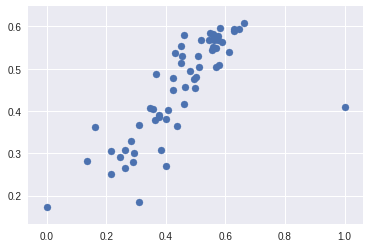

In [0]:
plt.scatter(input_data[:61,1],predicted_value)